## Numerical Methods Week 5
# Interpolation II
## Based on Tim Sauer's "Numerical Analysis" (Chapter 3, 3.3-3.4)

#### Importing required Python modules

In [1]:
import numpy as np, pandas as pd
from sympy import *
from scipy.special import factorial
from scipy.interpolate import CubicSpline
from math import sin, cos, pi, exp
import random
import matplotlib.pyplot as plt

## 3.3 Chebyshev Interpolation

### 3.3.1 Chebyshev's theorem

Chebyshev interpolation refers to a particular optimal way of spacing the points of the data as it is described in the following result:

<br/>

<span style="font-size:large;">*Theorem*. (**Chebyshev Theorem**.) The choice of real numbers $-1 \leq x_1 \leq \cdots \leq x_n \leq 1$ that makes the values of:

<span style="font-size:large;">$$\max_{-1 \leq x \leq 1} |(x - x_1) \cdots (x - x_n)|$$

<span style="font-size:large;">as small as possible is:

<span style="font-size:large;">$$x_i = \cos \frac{(2i - 1)\pi}{2n}, \mbox{ for } i = 1, \ldots, n$$

<span style="font-size:large;">and the minimum value is $1/2^{n - 1}$. In fact, the minimum is achieved by:

<span style="font-size:large;">$$(x - x_1) \cdots (x - x_n) = \frac{1}{2^{n - 1}} T_n(x),$$

<span style="font-size:large;">where $T_n(x)$ denotes the degree $n$ **Chebyshev polynomial**. Moreover, these $x_i$s are called **Chebyshev nodes**.</span>

<br/>

We conclude from the theorem that interpolation error can be minimized if the $n$ interpolation base points in $[−1, 1]$ are chosen to be the roots of the degree $n$ Chebyshev interpolating polynomial $T_n(x)$. These roots are:

$$x_i = \cos \, \frac{\textrm{odd} \, \pi}{2n},$$

where "**odd**" stands for the odd numbers from $1$ to $2n − 1$. Then we are guaranteed that:

$$|(x - x_1) \cdots (x - x_n)| < \frac{1}{2^{n - 1}}, \mbox{ for all } x \in [-1,1].$$

Thus, interpolating Chebyshev nodes and their values under a function $f(x)$, the interpolation error formula gives:

$$f(x) - P_{4}(x) = \frac{(x - x_1) \cdots (x - x_5)}{n!} f^{(n)}(c),$$

for some $c \in [-1,1]$.

<span style="font-size:large;">From the later equality, we obtain the following **worst case error bound** for the difference on $[-1,1]$ between $f(x)$ and the degree $n$ Chebyshev interpolating polynomial:</span>

<span style="font-size:large;">$$|f(x) - T_{n}(x)| \leq \frac{\max_{-1 \leq x \leq 1}|f^{(n)}(x)|}{2^{n-1} n!}, \mbox{ for all } x \in [-1,1].$$</span>

In [2]:
def worst_case_error(a, b, n, maxfn):
    return maxfn*((b-a)/2)**n/(factorial(n)*2**(n-1))

### <span style="color:#19bfc2">EXAMPLE 3.10</span>

<span style="font-size:large;">Find a worst-case error bound for the difference on $[−1,1]$ between $f(x) = e^x$ and the degree 4 Chebyshev interpolating polynomial.</span>

In [3]:
worst_case_error(-1, 1, 5, exp(1))

0.0014157717856557526

### 3.3.2 Chebyshev polynomials

<span style="font-size:large;">*Proposition*. For every integer $n \geq 0$, the **$n$th Chebyshev polynomial** $T_n(x)$ is defined by: 

<span style="font-size:large;">$$T_n(x) = \cos (n \arccos x)$$ 

<span style="font-size:large;">and it satisfies the following **recursion relation**, for any integer $n \geq 1$:

<span style="font-size:large;">$$T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x).$$
<p/>
<span style="font-size:large;">
1. Thus defined, $T_n$’s are polynomials with $\mathrm{deg}(T_n) = n$ and leading coefficient equal to $2^{n-1}$. In particular, the first four Chebyshev polynomials are:</span>
<p/>
<span style="font-size:large;">
$$ \begin{align}
T_0(x) &= 1\\
T_1(x) &= x\\
T_2(x) &= 2x^2 - 1\\
T_3(x) &= 4x^3 - 3x.
\end{align} $$
</span>
<p/>
<span style="font-size:large;">
2. $T_n(1) = 1$ and $T_n(-1) = (-1)^n$.
</span>
<p/>
<span style="font-size:large;">
3. $T_n(-x) = (-1)^n T_n(x)$, for all $x \in [-1,1]$.
</span>
<p/>
<span style="font-size:large;">
4. $\max_{-1 \leq x \leq 1}|T_n(x)| = 1$.
</span>
<p/>
<span style="font-size:large;">
5. All zeros of $T_n(x)$ are located in $(-1,1)$. In fact $x$ is a zero of $T_n(x)$ if and only if:</span>

<span style="font-size:large;">$$x = \cos \frac{\textrm{odd} \, \pi}{2n}.$$
<p/>
<span style="font-size:large;">
6. $T_n(x)$ alternates between $−1$ and $1$ a total of $n + 1$ times. In fact, this happens at $\cos0, \cos\pi/n, \ldots, \cos(n − 1)\pi/n, \cos\pi$.</span>

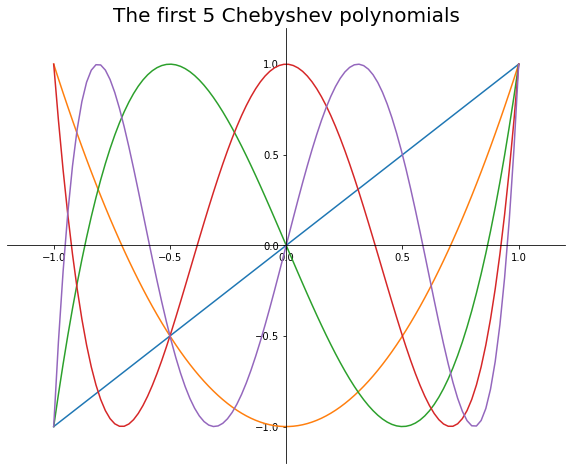

In [4]:
n = 5

fig = plt.figure(figsize=(10,8))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')  #center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
x = np.linspace(-1, 1, 100)

for k in range(1,n+1): 
    plt.plot(x, np.cos(k*np.arccos(x)))

ti = "The first %i Chebyshev polynomials" %n
plt.title(ti, fontsize=20)
plt.show()

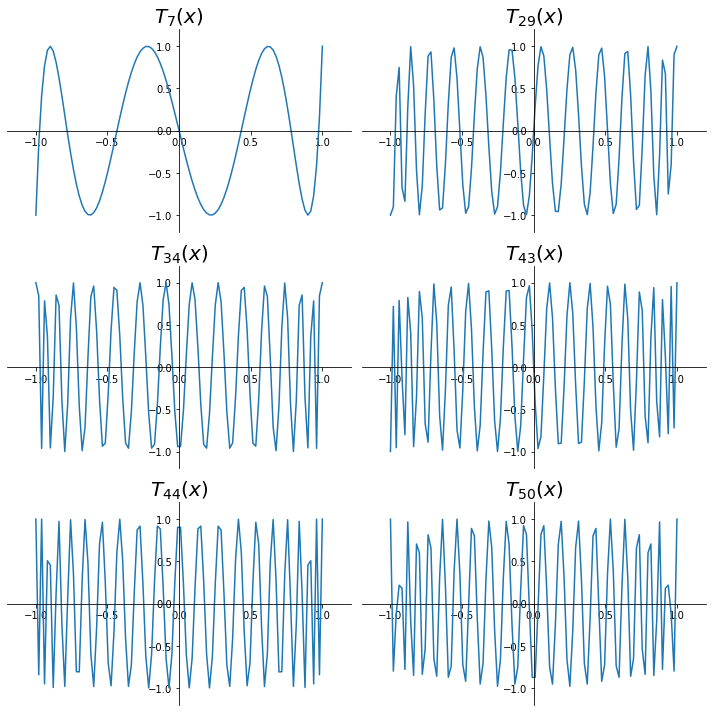

In [5]:
fig = plt.figure(figsize=(10,10))  
x = np.linspace(-1, 1, 100)
K=sorted(random.sample(range(1,51),6))
for i in range(len(K)):  #range(1,7): 
    ax=plt.subplot(3,2,i+1)
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.plot(x, np.cos(K[i]*np.arccos(x)))
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')  #center')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ti="$T_{%i}(x)$" %K[i]
    plt.title(ti, fontsize=20)
    plt.tight_layout()
plt.show()

### 3.3.3 Change of interval

When $[a,b]$ is the interval of Chebyshev interpolation, then the affine transformation $\frac{b - a}{2} x + \frac{b + a}{2}$ brings back to the interval $[-1,1]$. Hence, in $[a,b]$, the zeros of Chebyshev polynomials are at $\frac{b - a}{2} \cos \frac{\textrm{odd} \, \pi}{2n} + \frac{b + a}{2}$, while the minimax value $1/2^{n−1}$ must be replaced by $[(b − a)/2]^{n}/2^{n−1}$. In other words, on the interval $[a,b]$, we have:

$$x_i = \frac{b + a}{2} + \frac{b - a}{2} \cos \frac{(2i - 1)\pi}{2n}, \mbox{ for } i = 1, \ldots, n,$$

and the following inequality holds:

$$|(x - x_1) \cdots (x - x_n)| < \frac{ \big(\frac{b - a}{2}\big)^n }{2^{n - 1}}, \mbox{ for all } x \in [a,b].$$

In [6]:
def Chebyshev_nodes(a, b, n):
    return [0.5*(a+b) + 0.5*(b-a)*cos((2*i-1)*pi/(2*n)) for i in range(1,n+1)]

### <span style="color:#19bfc2">EXAMPLE 3.11</span>

<span style="font-size:large;">Find the four Chebyshev base points for interpolation on the interval $[0,\pi/2]$, and find an upper bound for the Chebyshev interpolation error for $f(x) = \sin x$ on this interval.</span>

In [7]:
cn=Chebyshev_nodes(0, pi/2, 4)
cn

[1.511011451432306,
 1.0859570283396214,
 0.4848392984552752,
 0.059784875362590584]

In [8]:
worst_case_error(0, pi/2, 4, 1)

0.0019817930304769373

In [9]:
def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Create a square matrix to hold pyramid
    pyramid[::,0] = y # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # return first row

def NDD_poly(coeff_vector,x,nt=0):
    # create the unique polynomial of degree at most equal to size of data minus one 
    final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
    n = coeff_vector.shape[0] # get number of coeffs
    for i in range(n):
        p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
        for j in range(i):
            # each vector has degree of i
            # their terms are dependant on 'x' values
            p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
            p = np.polymul(p, p_temp) # multiply dummy with expression
        p *= coeff_vector[i] # apply coefficient
        final_pol = np.polyadd(final_pol, p) # add to target polynomial
    p = np.flip(final_pol[0].coef, axis=0)
    y=Symbol('x')
    pp = []
    for i in p.tolist():
        if nt==0:
            pp.append(Rational(i))
        else:
            pp.append(i)
    p1=Poly(pp, y)
    return p1.as_expr()

In [10]:
X=Chebyshev_nodes(0, pi/2, 4)  #10)
Y=[sin(a) for a in X]

coeff_vector = getNDDCoeffs(X, Y)
sp=NDD_poly(coeff_vector,X,nt=1)

cop=poly(sp).coeffs()
cop=np.array(cop)

ip=np.poly1d(cop)
print("P_3(x) =",'\n',ip)

iy=[ip(a) for a in X]

P_3(x) = 
          3           2
-0.1143 x - 0.06648 x + 1.023 x - 0.001131


In [11]:
def sip(x,a,f):
    xm=x%(2*a)
    if xm>3*a/2:
        xm=2*a-xm
        return -f(xm)
    if xm>a:
        xm=xm-a
        return -f(xm)
    elif xm>a/2:
        xm=a-xm
        return f(xm)
    else:
        return f(xm)

In [12]:
XX=[1,2,3,4,14,1000]
YY=[round(sin(a),5) for a in XX]
ZZ=[round(sip(a,pi,ip),5) for a in XX]
WW=[round(abs(sin(a)-sip(a,pi,ip)),5) for a in XX]
df=pd.DataFrame(
    {'$x$': XX,
     '$\sin x$': YY,
     '$P_3(x)$': ZZ,
     'error': WW
    })
df

,$x$,$\sin x$,$P_3(x)$,error
0,1,0.84147,0.84083,0.00064
1,2,0.90930,0.90975,0.00045
2,3,0.14112,0.14202,0.00090
3,4,-0.75680,-0.75551,0.00130
4,14,0.99061,0.99174,0.00113
5,1000,0.82688,0.82607,0.00081


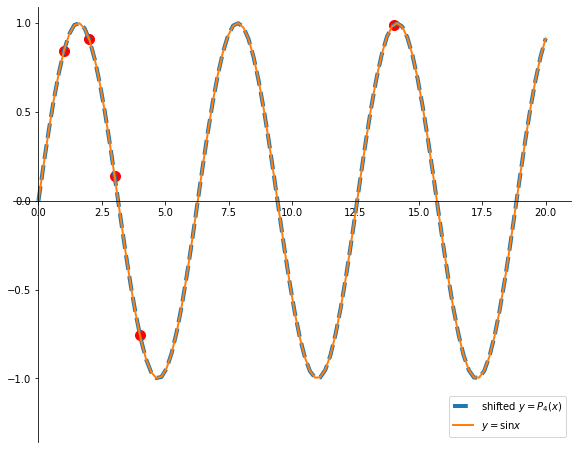

In [13]:
X=[1,2,3,4,14] #,1000]  
Y=[sin(a) for a in X]
d=len(X)-1
fig = plt.figure(figsize=(10,8))  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')  #center')
ax.spines['bottom'].set_position('zero')  #center')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.ylim([min(Y)-0.6,max(Y)+0.1])

x = np.linspace(0,20,100) #0, max(x), 100)    #xx --> x,   zz --> z
z=[sip(a,pi,ip) for a in x]
lti1s="shifted $y = P_{%i}(x)$" %d
plt.plot(x, z,'--', linewidth=4, label=lti1s)  
ax.scatter(X, Y, c = 'r',s=100)
lti2="$y = \sin x$" 
plt.plot(x, np.sin(x),'-', linewidth=2, label=lti2)
ax.legend(loc='lower right')
# plt.axvline(x=pi/2,color='g')
# plt.axvline(x=pi,color='g')
# plt.axvline(x=3*pi/2,color='g')
# plt.axvline(x=2*pi,color='g')
# plt.axvline(x=5*pi/2,color='g')
plt.show()

## 3.4 Cubic Splines

A **spline** is a special function defined piecewise by polynomials. Here, we are going to be concerned with **cubic splines** (i.e., piecewise degree 3 polynomials) interpolating a set of data points $(x_1,y_1), \ldots, (x_n,y_n)$ with $x_1 < \cdots < x_n$. Let us denote by $S(x)$ such a spline with the understanding that this spline is a set of $n - 1$ degree 3 polynomials $S_i(x) = S\big|_{[x_{i-1},x_{i}]}$, each one defined in the corresponding subinterval, for $i = 1, 2, \ldots, n - 1$, as: 

$$S_i(x) = a_i (x - x_i)^3 + b_i (x - x_i)^2 + c_i (x - x_i) + d_i.$$

These cubic polynomials $S_i$ should satisfy the following linear system of equations:

$$S_i(x_i) = y_i, \mbox{ for } i = 1, \ldots, n-1,$$

$$S_i(x_{i+1}) = y_{i+1}, \mbox{ for } i = 1, \ldots, n-1,$$

$$S^{\,'}_{i-1}(x_i) = S^{\,'}_{i}(x_i), \mbox{ for } i = 2, \ldots, n-1,$$

$$S^{\,''}_{i-1}(x_i) = S^{\,''}_{i}(x_i), \mbox{ for } i = 2, \ldots, n-1.$$

In the above system, the first $n - 1$ equations simply state the requirement that each polynomial should pass from the left end point of each corresponding subinterval and the next $n - 1$ equations guarantee that the spline should interpolates the left end point of each corresponding subinterval too. The next $n - 2$ equations force the slopes of neighboring parts of the spline to agree where they meet. Finally, the last $n - 2$ equations do the same for the curvature, represented by the second derivative. Thus, totally, we have $4n - 6$ equations for $4(n - 1)$ equations, meaning that the system of equations is underdetermined and so has infinitely many solutions. The simplest way of resolving this shortage of equations is by adding the following two more equations when we require that the spline $S(x)$ has an inflection point at each end of the defining (total) interval $[x_1,x_n]$:

$$S^{\,''}_{1}(x_1) = 0 \mbox{ and } S^{\,''}_{n - 1}(x_n) = 0. \tag{Natural spline}$$

### <span style="color:#19bfc2">EXAMPLE 3.13</span>

<span style="font-size:large;">Find the natural cubic spline through $(1, 2), (2, 1), (4, 4),$ and $(5,3)$.</span>

As now we have $n = 4$ data points, the $n - 1 = 3$ cubic polynomials are:

$$S_1(x) = a_1 (x - 1)^3 + b_1 (x - 1)^2 + c_1 (x - 1) + d_1$$

$$S_2(x) = a_2 (x - 2)^3 + b_2 (x - 2)^2 + c_2 (x - 2) + d_2$$

$$S_3(x) = a_3 (x - 4)^3 + b_3 (x - 4)^2 + c_3 (x - 4) + d_3$$

and their $4(n - 1) = 12$ coefficients solve the following system of $12$ equations:

$$S_1(1) = d_1 = 2$$

$$S_2(2) = d_2 = 1$$

$$S_3(4) = d_3 = 4$$


$$S_1(2) = a_1 + b_i + c_1 + d_1 = 1$$

$$S_2(4) = 8 a_2 + 4 b_2 + 2 c_2 + d_2 = 4$$

$$S_3(5) = a_3 + b_3 + c_3 + d_3 = 3$$


$$S^{'}_{1}(2) = 3 a_1 + 2 b_1 + c_1 = c_2 = S^{'}_{2}(2)$$

$$S^{'}_{2}(4) = 12 a_2 + 4 b_2 + c_2 = c_3 = S^{'}_{3}(4)$$

$$S^{''}_{1}(2) = 6 a_1 + 2 b_1 = 2 b_2 = S^{''}_{2}(2)$$

$$S^{''}_{2}(4) = 12 a_2 + 2 b_2 = 2 b_3 = S^{''}_{3}(4)$$

$$S^{''}_{1}(1) = 2 b_1 = 0$$

$$S^{''}_{3}(5) = 6 a_3 + 2 b_3 = 0$$

In [14]:
a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,x = symbols('a1 b1 c1 d1 a2 b2 c2 d2 a3 b3 c3 d3 x') #m
def S1(x): return a1*(x-1)**3 + b1*(x-1)**2 + c1*(x-1) + d1
def S2(x): return a2*(x-2)**3 + b2*(x-2)**2 + c2*(x-2) + d2
def S3(x): return a3*(x-4)**3 + b3*(x-4)**2 + c3*(x-4) + d3

equations=[
    
Eq(S1(1),2),
Eq(S2(2),1),
Eq(S3(4),4),    
    
Eq(S1(2),1),    
Eq(S2(4),4),
Eq(S3(5),3),

Eq(diff(S1(x)-S2(x),x).subs(x,2),0),
Eq(diff(S2(x)-S3(x),x).subs(x,4),0),

Eq(diff(diff(S1(x)-S2(x),x),x).subs(x,2),0),
Eq(diff(diff(S2(x)-S3(x),x),x).subs(x,4),0),
    
Eq(diff(diff(S1(x),x),x).subs(x,1),0),
Eq(diff(diff(S3(x),x),x).subs(x,5),0)
]

for i in equations:
    print(i)

Eq(d1, 2)
Eq(d2, 1)
Eq(d3, 4)
Eq(a1 + b1 + c1 + d1, 1)
Eq(8*a2 + 4*b2 + 2*c2 + d2, 4)
Eq(a3 + b3 + c3 + d3, 3)
Eq(3*a1 + 2*b1 + c1 - c2, 0)
Eq(12*a2 + 4*b2 + c2 - c3, 0)
Eq(6*a1 + 2*b1 - 2*b2, 0)
Eq(12*a2 + 2*b2 - 2*b3, 0)
Eq(2*b1, 0)
Eq(6*a3 + 2*b3, 0)


In [15]:
solve(equations)  

{a1: 5/8,
 a2: -5/8,
 a3: 5/8,
 b1: 0,
 b2: 15/8,
 b3: -15/8,
 c1: -13/8,
 c2: 1/4,
 c3: 1/4,
 d1: 2,
 d2: 1,
 d3: 4}

In [16]:
data = [(1, 2), (2, 1), (4, 4), (5, 3)]
X = [d[0] for d in data]
Y = [d[1] for d in data]

cs = CubicSpline(X, Y, bc_type=((2, 0.0), (2, 0.0)))

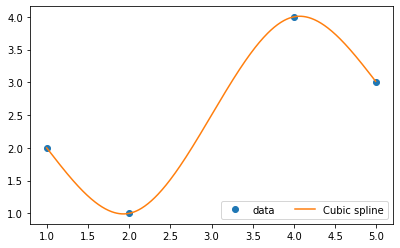

In [17]:
xs = np.arange(min(X), max(X), 0.01) #-0.5
plt.figure(figsize=(6.5, 4))
plt.plot(X, Y, 'o', label='data')
plt.plot(xs, cs(xs), label="Cubic spline")
plt.legend(loc='lower right', ncol=2)
plt.show()

### <span style="color:#19bfc2">Another Example</span>

<span style="font-size:large;">Find the natural cubic spline through  (1,1), (2,1/2.), (3,1/3.), (4,1/4.), (5,1).

In [18]:
a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,x = symbols('a1 b1 c1 d1 a2 b2 c2 d2 a3 b3 c3 d3 a4 b4 c4 d4 x') #m
def S1(x): return a1*(x-1)**3 + b1*(x-1)**2 + c1*(x-1) + d1
def S2(x): return a2*(x-2)**3 + b2*(x-2)**2 + c2*(x-2) + d2
def S3(x): return a3*(x-3)**3 + b3*(x-3)**2 + c3*(x-3) + d3
def S4(x): return a4*(x-4)**3 + b4*(x-4)**2 + c4*(x-4) + d4

equations=[
    
Eq(S1(1),1),
Eq(S2(2),1/2.),
Eq(S3(3),1/3.),
Eq(S4(4),1/4.),
    
Eq(S1(2),1/2.),    
Eq(S2(3),1/3.),
Eq(S3(4),1/4.),
Eq(S4(5),1),

Eq(diff(S1(x)-S2(x),x).subs(x,2),0),
Eq(diff(S2(x)-S3(x),x).subs(x,3),0),
Eq(diff(S3(x)-S4(x),x).subs(x,4),0),

Eq(diff(diff(S1(x)-S2(x),x),x).subs(x,2),0),
Eq(diff(diff(S2(x)-S3(x),x),x).subs(x,3),0),
Eq(diff(diff(S3(x)-S4(x),x),x).subs(x,4),0),
    
Eq(diff(diff(S1(x),x),x).subs(x,1),0),
Eq(diff(diff(S4(x),x),x).subs(x,5),0)
]

for i in equations:
    print(i)

Eq(d1, 1)
Eq(d2, 0.5)
Eq(d3, 0.333333333333333)
Eq(d4, 0.25)
Eq(a1 + b1 + c1 + d1, 0.5)
Eq(a2 + b2 + c2 + d2, 0.333333333333333)
Eq(a3 + b3 + c3 + d3, 0.25)
Eq(a4 + b4 + c4 + d4, 1)
Eq(3*a1 + 2*b1 + c1 - c2, 0)
Eq(3*a2 + 2*b2 + c2 - c3, 0)
Eq(3*a3 + 2*b3 + c3 - c4, 0)
Eq(6*a1 + 2*b1 - 2*b2, 0)
Eq(6*a2 + 2*b2 - 2*b3, 0)
Eq(6*a3 + 2*b3 - 2*b4, 0)
Eq(2*b1, 0)
Eq(6*a4 + 2*b4, 0)


In [19]:
solve(equations)

{a1: 0.0982142857142857,
 a2: -0.157738095238095,
 a3: 0.282738095238095,
 a4: -0.223214285714286,
 b1: 0.0,
 b2: 0.294642857142857,
 b3: -0.178571428571429,
 b4: 0.669642857142857,
 c1: -0.598214285714286,
 c2: -0.303571428571429,
 c3: -0.187500000000000,
 c4: 0.303571428571429,
 d1: 1.00000000000000,
 d2: 0.500000000000000,
 d3: 0.333333333333333,
 d4: 0.250000000000000}

In [20]:
data = [(1, 1), (2, 1/2.), (3, 1/3.), (4, 1/4.), (5, 1)]
X = [d[0] for d in data]
Y = [d[1] for d in data]

cs = CubicSpline(X, Y, bc_type=((2, 0.0), (2, 0.0)))

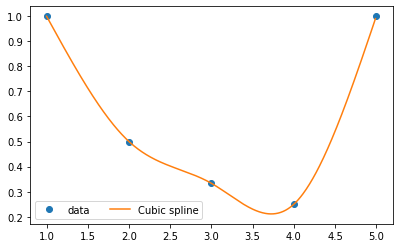

In [21]:
xs = np.arange(min(X), max(X), 0.01)
plt.figure(figsize=(6.5, 4))
plt.plot(X, Y, 'o', label='data')
plt.plot(xs, cs(xs), label="Cubic spline")
plt.legend(loc='lower left', ncol=2)
plt.show()

### <span style="color:#19bfc2">EXAMPLE 3.14</span>

<span style="font-size:large;">Find the natural cubic spline through $(0,3),(1,−2),$ and $(2,1)$.</span>

As now we have $n = 3$ data points, the $n - 1 = 2$ cubic polynomials are:

$$S_1(x) = a_1 x^3 + b_1 x^2 + c_1 x + d_1$$

$$S_2(x) = a_2 (x - 1)^3 + b_2 (x - 1)^2 + c_2 (x - 1) + d_2$$


and their $4(n - 1) = 8$ coefficients solve the following system of $12$ equations:

$$S_1(0) = d_1 = 3$$

$$S_2(1) = d_2 = -2$$


$$S_1(1) = a_1 + b_i + c_1 + d_1 = -2$$

$$S_2(2) = a_2 + b_2 + c_2 + d_2 = 1$$


$$S^{'}_{1}(1) = 3 a_1 + 2 b_1 + c_1 = c_2 = S^{'}_{2}(1)$$

$$S^{''}_{1}(1) = 6 a_1 + 2 b_1 = 2b_2 = S^{''}_{2}(1)$$


$$S^{''}_{1}(1) = 2 b_1 = 0$$

$$S^{''}_{3}(4) = 6 a_2 + 2 b_2 = 0$$

In [22]:
a1,b1,c1,d1,a2,b2,c2,d2,x = symbols('a1 b1 c1 d1 a2 b2 c2 d2 x') 
def S1(x): return a1*(x-0)**3 + b1*(x-0)**2 + c1*(x-0) + d1
def S2(x): return a2*(x-1)**3 + b2*(x-1)**2 + c2*(x-1) + d2

equations=[
Eq(S1(0),3),
Eq(S1(1),-2),    

Eq(S2(1),-2),
Eq(S2(2),1),

Eq(diff(S1(x)-S2(x),x).subs(x,1),0),

Eq(diff(diff(S1(x)-S2(x),x),x).subs(x,1),0),
    
Eq(diff(diff(S1(x),x),x).subs(x,0),0),
Eq(diff(diff(S2(x),x),x).subs(x,2),0)
]

for i in equations:
    print(i.as_expr())

Eq(d1, 3)
Eq(a1 + b1 + c1 + d1, -2)
Eq(d2, -2)
Eq(a2 + b2 + c2 + d2, 1)
Eq(3*a1 + 2*b1 + c1 - c2, 0)
Eq(6*a1 + 2*b1 - 2*b2, 0)
Eq(2*b1, 0)
Eq(6*a2 + 2*b2, 0)


In [23]:
solve(equations)  

{a1: 2, a2: -2, b1: 0, b2: 6, c1: -7, c2: -1, d1: 3, d2: -2}

In [24]:
data = [(0, 3), (1, -2), (2, 1)]
X = [d[0] for d in data]
Y = [d[1] for d in data]

cs = CubicSpline(X, Y, bc_type=((2, 0.0), (2, 0.0)))

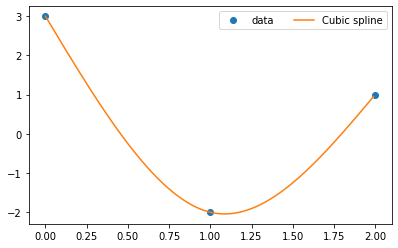

In [25]:
xs = np.arange(min(X), max(X), 0.01)
plt.figure(figsize=(6.5, 4))
plt.plot(X, Y, 'o', label='data')
plt.plot(xs, cs(xs), label="Cubic spline")
plt.legend(loc='upper right', ncol=2)
plt.show()

### 3.4.2 Endpoint conditions

(a) **Natural cubic spline**: $S^{''}_1(x_1) = 0$ and $S^{''}_{n-1}(x_n) = 0$.<p/>
(b) **Curvature-adjusted cubic spline**: This endpoint condition requires setting $S^{''}_1(x_1)$ and $S^{''}_{n-1}(x_n)$ to arbitrary values, chosen by the user, instead of zero.  <p/>
(c) **Clamped cubic spline**: Now it is the first derivatives $S^{'}_1(x_1)$ and $S^{'}_{n−1}(x_n)$ that are set to have user-specified values. <p/>
(d) **Parabolically terminated cubic spline**: The first and last parts of the spline, $S_1$ and $S_{n−1}$, are forced to be at most degree $2$, by specifying that $a_1 = 0 = a_{n−1}$. <p/>
(e) **Not-a-knot cubic spline**: The two added equations are $a_1 = a_2$ and $a_{n−2} = a_{n−1}$, or equivalently,  $S^{'''}_1(x_2) = S^{'''}_{2}(x_2)$ and $S^{'''}_{n-2}(x_{n-1}) = S^{'''}_{n-1}(x_{n-1})$. 

<span style="font-size:large;">*Theorem*. Assume that $n \geq 2$. Then, for a set of data points $(x_1,y_1), \ldots, (x_n,y_n)$ and for any one of the end conditions given by Properties (a)-(c), there is a unique cubic spline satisfying the end conditions and fitting the points. The same is true assuming that $n \geq 3$ for Property (d) and $n \geq 4$ for Property (e).</span>

### See https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html about how scipy.interpolate.CubicSplines implements these boundary conditions